<a href="https://colab.research.google.com/github/sugarforever/OpenAI-Tutorials/blob/main/pandasai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PandasAI

PandasAI is a Python library that makes it easy to ask questions to your data (CSV, XLSX, PostgreSQL, MySQL, BigQuery, Databrick, Snowflake, etc.) in natural language.

It helps you to explore, clean, and analyze your data using generative AI.

GitHub: [https://github.com/Sinaptik-AI/pandas-ai](https://github.com/Sinaptik-AI/pandas-ai)

Request Your Panda API Key: [https://www.pandabi.ai](https://www.pandabi.ai)


In [53]:
!pip install pandasai -U

In [54]:

import os
from pandasai import SmartDataframe

# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)

from google.colab import userdata

os.environ["PANDASAI_API_KEY"] = userdata.get('PANDASAI_API_KEY')

# You can instantiate a SmartDataframe with a path to a CSV file
sdf = SmartDataframe("Yulu.csv", config={"verbose": True})

response = sdf.chat("How many seasons are included in this dataset?")
print(response)

The number of seasons included in this dataset is: 4.


In [56]:
print(sdf.last_code_executed)

seasons_count = dfs[0]['season'].nunique()
result = {'type': 'string', 'value': f'The number of seasons included in this dataset is: {seasons_count}.'}


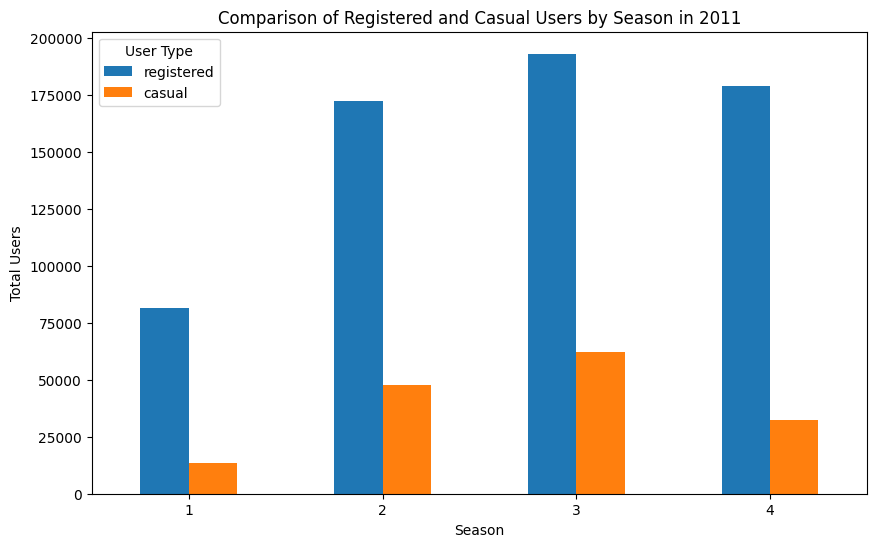

/content/exports/charts/temp_chart.png


In [57]:
response = sdf.chat("Plot the comparison between registered and casual users on seasons level in 2011")
print(response)

In [58]:
print(sdf.last_code_executed)

df_2011 = dfs[0][dfs[0]['datetime'].str.startswith('2011')]
seasonal_data = df_2011.groupby('season')[['registered', 'casual']].sum()
seasonal_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Registered and Casual Users by Season in 2011')
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.xticks(rotation=0)
plt.legend(title='User Type')
plt.show()
result = {'type': 'plot', 'value': '/content/exports/charts/temp_chart.png'}


## PandasAI with OpenAI

In [59]:
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from google.colab import userdata

openai_llm = OpenAI(api_token=userdata.get('OPENAI_API_KEY'))


In [60]:
openai_llm.chat_completion("Who are you?", memory = None)

'I am a language model AI created by OpenAI. I am here to assist you with any questions or tasks you may have. How can I help you today?'

In [61]:
sdf = SmartDataframe("Yulu.csv", config={"llm": openai_llm, "verbose": True})

/content/exports/charts/temp_chart.png


<Figure size 1000x600 with 0 Axes>

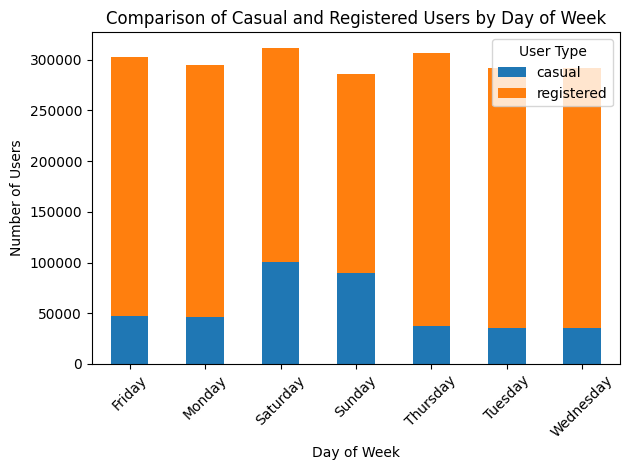

In [62]:
response = sdf.chat("Plot the comparison between registered and casual users in the days of week")
print(response)

In [63]:
print(sdf.last_code_executed)

for df in dfs:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['day_of_week'] = df['datetime'].dt.day_name()
grouped_data = pd.concat(dfs).groupby('day_of_week')[['casual', 'registered']].sum()
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Comparison of Casual and Registered Users by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Users')
plt.legend(title='User Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/content/exports/charts/temp_chart.png'}
